<a href="https://colab.research.google.com/github/AlifaNurHafizhah001/Latihan_Naive-Bayes_Sistem-Cerdas/blob/main/Kelompok_1_Sistem_Cerdas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Beril Khoiriyatul Hasanah =
Alifa Nur Hafizhah =
Maifazul Azizah = E42240182
Lady Yunalesca =

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
df = pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [35]:
df.drop('Glucose', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [36]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [37]:
correlation = df.corr()
correlation['Outcome'].sort_values(ascending=False)

,Outcome
Outcome,1.000000
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


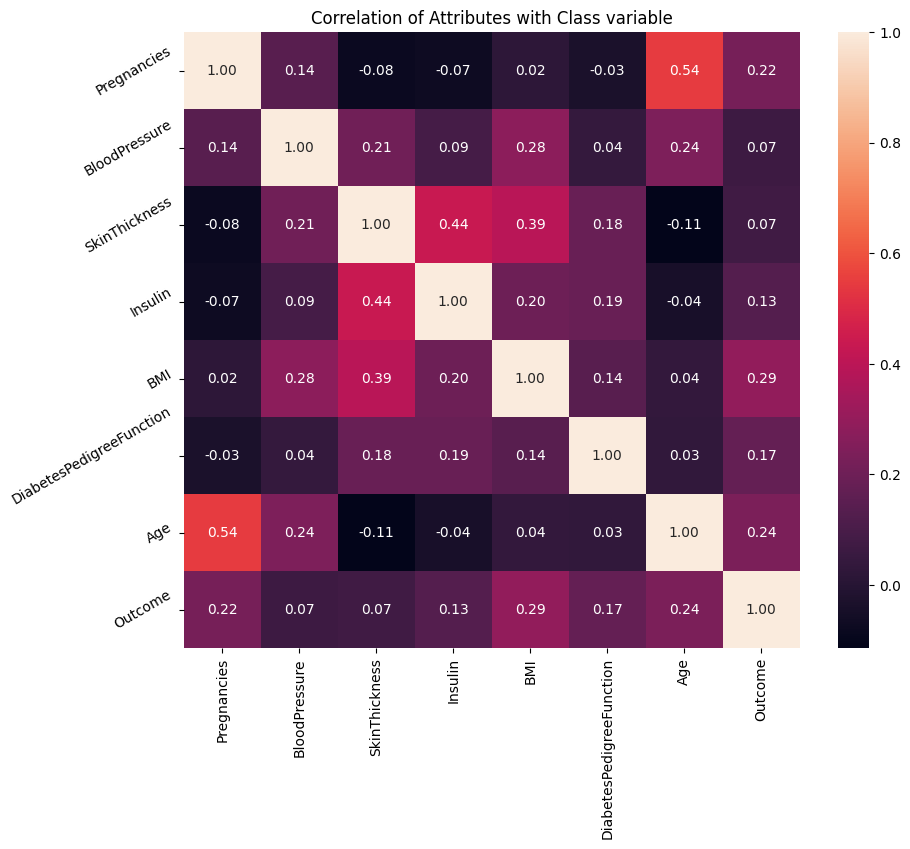

In [38]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [39]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...
763,1.827813,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [437]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)
X_train.shape, X_test.shape

((614, 7), (154, 7))

In [438]:
X_train

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
203,-0.547919,0.046245,-0.284563,-0.310843,-1.471321,-0.715395,-0.531023
287,-0.844885,0.873409,1.158182,1.217347,1.727044,1.015133,-0.360847
273,-0.844885,0.459827,1.848191,-0.302160,0.153245,-0.150632,-1.041549
414,-1.141852,-0.470732,0.907270,0.757153,0.330932,0.187621,-1.041549
468,1.233880,-3.572597,-1.288212,-0.692891,-0.252897,-0.872441,0.404942
...,...,...,...,...,...,...,...
335,-1.141852,0.356432,1.409094,1.521248,2.018958,-0.642912,-0.616111
365,0.342981,-0.780919,0.468173,0.027790,0.254780,0.081917,-0.275760
618,1.530847,0.666618,0.217261,-0.692891,-0.481351,2.446670,1.425995
227,-0.250952,-0.884314,1.095454,-0.692891,0.660922,0.543995,-0.786286


In [439]:
X_test

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
239,-1.141852,0.356432,-1.288212,-0.692891,-1.725160,0.332587,-0.531023
243,0.639947,-0.987710,0.091805,0.835299,-0.620962,2.555394,-0.020496
764,-0.547919,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
122,-0.547919,0.253036,0.593630,0.175399,0.204013,-0.204994,-0.871374
33,0.639947,1.183596,-1.288212,-0.692891,-1.534781,-0.857340,-0.445935
...,...,...,...,...,...,...,...
675,0.639947,0.046245,-1.288212,-0.692891,-0.138669,-0.434524,-0.190672
8,-0.547919,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
596,-1.141852,0.356432,-1.288212,-0.692891,1.688968,-0.839219,1.085644
521,-0.250952,0.563223,0.781814,0.435886,0.153245,-0.503986,-0.616111


In [440]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13,weights='distance',metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13, weights='distance')

In [441]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [442]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7403


In [443]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [444]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7403


In [445]:
y_test.value_counts()

,count
Outcome,
0,103
1,51


In [446]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Negatives(TP) = ', cm[0,0])
print('\nTrue Positives(TN) = ', cm[1,1])
print('\nFalse Negatives(FP) = ', cm[0,1])
print('\nFalse Positives(FN) = ', cm[1,0])

Confusion matrix

 [[86 17]
 [23 28]]

True Negatives(TP) =  86

True Positives(TN) =  28

False Negatives(FP) =  17

False Positives(FN) =  23


<Axes: >

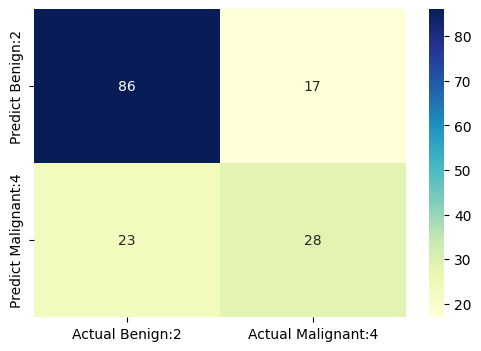

In [447]:
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(cm, columns=['Actual Benign:2', 'Actual Malignant:4'], index=['Predict Benign:2', 'Predict Malignant:4'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [448]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       103
           1       0.62      0.55      0.58        51

    accuracy                           0.74       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.74      0.74       154



In [449]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.66233766 0.75324675 0.7012987  0.68831169 0.64935065 0.72727273
 0.68831169 0.80519481 0.63157895 0.65789474]


In [450]:
print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Average cross-validation score: 0.70
